In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#Importing, cleaning, preparing dataset for analysis






In [64]:
dataset = pd.read_csv('SaYoPillow.csv')


#Renaming each individual column 

dataset = dataset.rename(columns={'sr': 'snoring_range', 
                        'rr': 'respiration_rate',
                        't': 'temp',
                        'lm': 'limb_movement_rate',
                        'bo': 'blood_oxy',
                        'rem': 'eye_movement',
                        'sr.1': 'num_hours_sleep',
                        'hr': 'heart_rate',
                        'sl': 'stress_level'})

#Creating labels for each column for future use 
snoring_range = dataset.iloc[:, 0]
respiration_rate = dataset.iloc[:,1]
temp = dataset.iloc[:,2]
limb_movement_rate = dataset.iloc[:,3]
blood_oxy = dataset.iloc[:,4]
eye_movement = dataset.iloc[:,5]
num_hours_sleep = dataset.iloc[:,6]
heart_rate = dataset.iloc[:,7]
stress_level = dataset.iloc[:,8]

# Visualizing all the Columns vs Stress Level

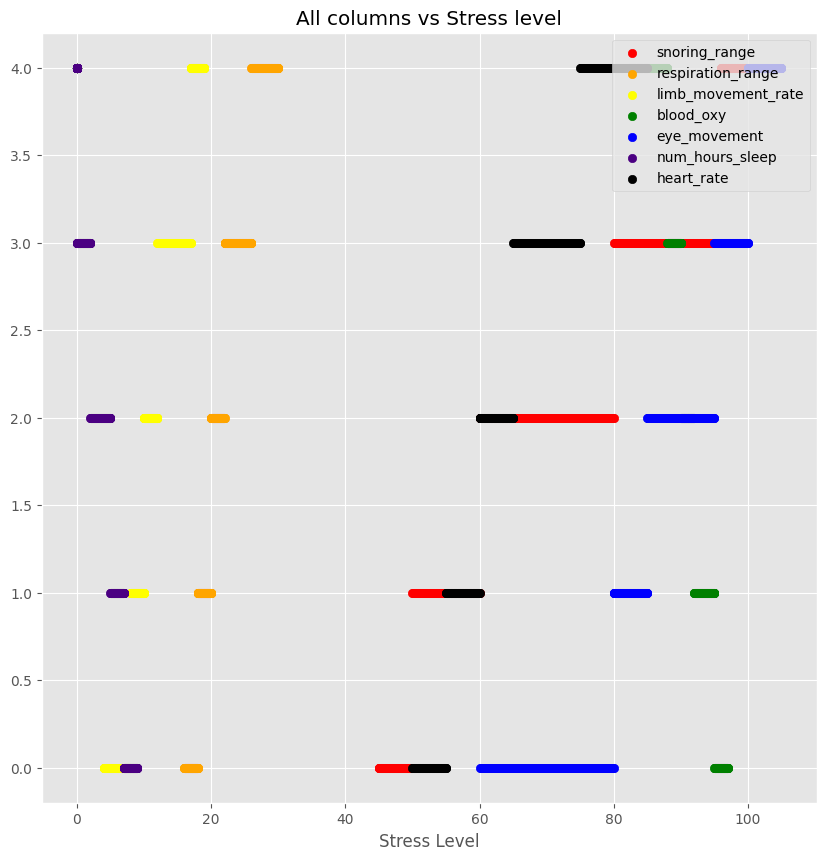

In [58]:
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 10)


#Plotting each Column vs Stress Level
plt.title("All columns vs Stress level")
plt.xlabel("Stress Level")

plt.scatter(snoring_range, stress_level, color = 'red', label='snoring_range')
plt.scatter(respiration_rate, stress_level, color = 'orange', label='respiration_range')
plt.scatter(limb_movement_rate, stress_level, color= 'yellow', label='limb_movement_rate')
plt.scatter(blood_oxy, stress_level, color='green', label='blood_oxy')
plt.scatter(eye_movement, stress_level, color='blue', label='eye_movement')
plt.scatter(num_hours_sleep, stress_level, color='indigo', label='num_hours_sleep')
plt.scatter(heart_rate, stress_level, color='black', label='heart_rate')
plt.legend(loc='upper right')
plt.show()


The Scatter Plot provides a visual representation of how specific factors, such as hours of sleep (Yellow) or snoring range (Red), can impact stress levels. This plot enables the reader to gain a better understanding of the relationship between these variables.

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   snoring_range       630 non-null    float64
 1   respiration_rate    630 non-null    float64
 2   temp                630 non-null    float64
 3   limb_movement_rate  630 non-null    float64
 4   blood_oxy           630 non-null    float64
 5   eye_movement        630 non-null    float64
 6   num_hours_sleep     630 non-null    float64
 7   heart_rate          630 non-null    float64
 8   stress_level        630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


The "info" method was used to check for null values in the dataset. The output of the method indicates that there are no missing values present, which means that there is no requirement for any data replacement to handle missing values.

In [60]:
dataset.columns

Index(['snoring_range', 'respiration_rate', 'temp', 'limb_movement_rate',
       'blood_oxy', 'eye_movement', 'num_hours_sleep', 'heart_rate',
       'stress_level'],
      dtype='object')

The columns are, snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

In [61]:
dataset.describe()

,snoring_range,respiration_rate,temp,limb_movement_rate,blood_oxy,eye_movement,num_hours_sleep,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


#Splitting the data set into Training/Test sets


In [62]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#independent value 
y = dataset['stress_level']
y.shape
#dependent values 
X = dataset.drop('stress_level', axis=1)
X.shape
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)


(630, 8)
(630,)
Training feature set size: (441, 8)
Test feature set size: (189, 8)
Training variable set size: (441,)
Test variable set size: (189,)


# Loop through each column and fit a regression model



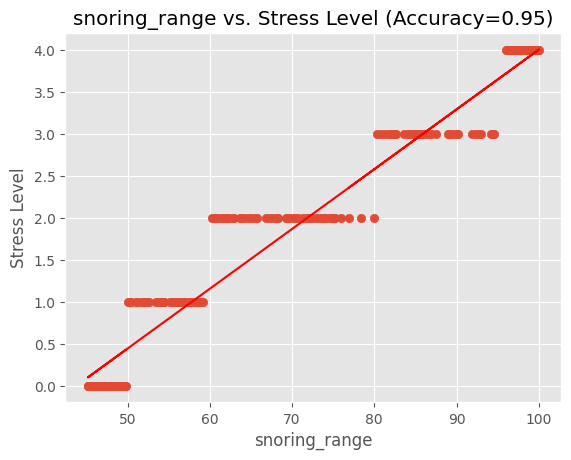

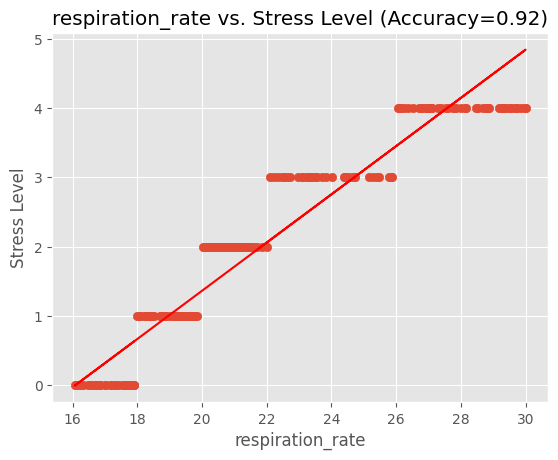

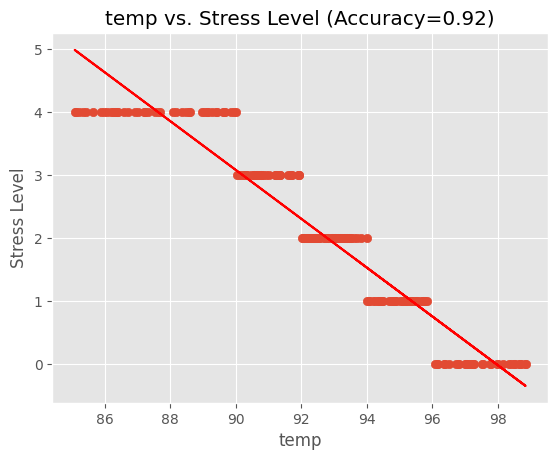

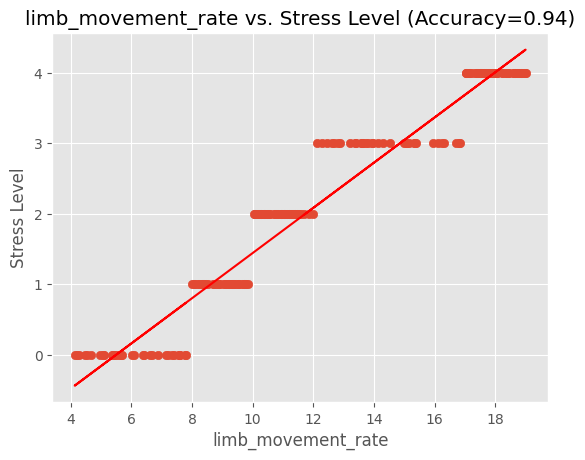

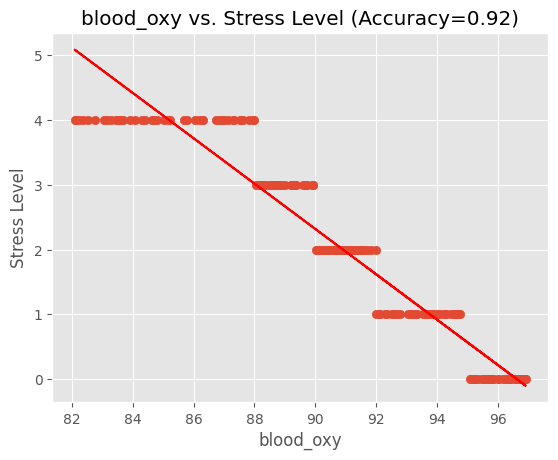

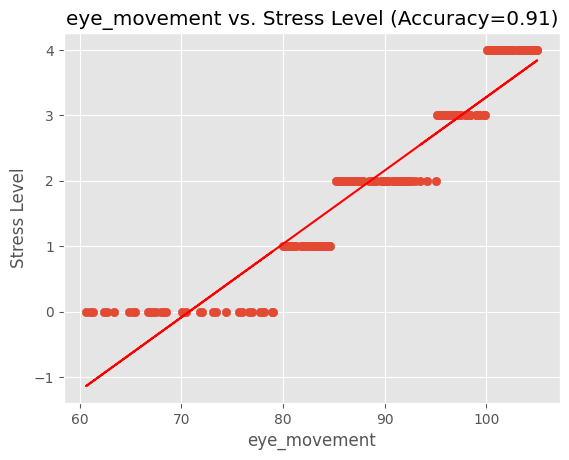

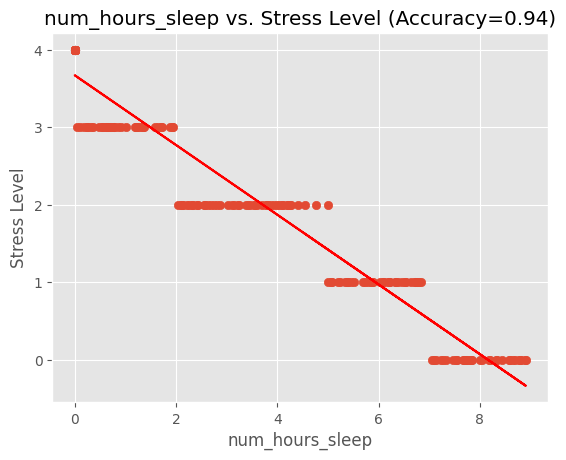

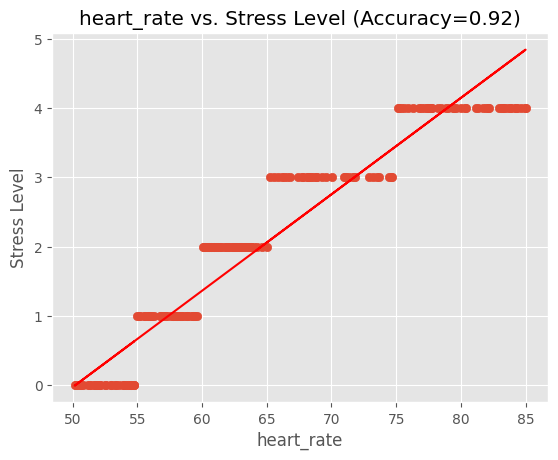

In [72]:
for col in X.columns:
    # Reshapint the data for scikit-learn
    X_train_col = X_train[col].values.reshape(-1, 1)
    y_train_col = y_train.values.reshape(-1, 1)
    X_test_col = X_test[col].values.reshape(-1, 1)
    y_test_col = y_test.values.reshape(-1, 1)
    
    # Create and fit the model using the training data
    model = LinearRegression()
    model.fit(X_train_col, y_train_col)

    #Getting the accuracy of the model
    Accuracy = model.score(X_test_col, y_test_col)

    #Getting the Correlation Coefficient
    coeff = model.coef_

    
    # Plot the data and the regression line using the testing data
    plt.scatter(X_test_col, y_test_col)
    plt.plot(X_test_col, model.predict(X_test_col), color='red')
    plt.title(f"{col} vs. Stress Level (Accuracy={Accuracy:.2f})")
    plt.xlabel(col)
    plt.ylabel('Stress Level')
    plt.show()

This code generates seperate graphs to visualize linear regressions for teach column again Stress Level. 

It divides the data into training and testing sets using the train_test_split()

Then the code loops through each independent variable column in the dataset and creates a linear regrssion using the training data. Then the code plots the regression line using the testing data. 

By splitting our code into training and testing data the code allows the ability to evaluate the the model's performance on data it is unfamilar. Therefore we can se how well the model can predict outcomes on new data